clear_dataset


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
df=pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")

In [8]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=df[col].str.lower()
        df[col]=df[col].str.replace(" ","_")
df.head()        

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [12]:
df=df.drop(["market_category"],axis=1)

In [13]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11812 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11812 non-null  object 
 1   model              11812 non-null  object 
 2   year               11812 non-null  int64  
 3   engine_fuel_type   11812 non-null  object 
 4   engine_hp          11812 non-null  float64
 5   engine_cylinders   11812 non-null  float64
 6   transmission_type  11812 non-null  object 
 7   driven_wheels      11812 non-null  object 
 8   number_of_doors    11812 non-null  float64
 9   vehicle_size       11812 non-null  object 
 10  vehicle_style      11812 non-null  object 
 11  highway_mpg        11812 non-null  int64  
 12  city_mpg           11812 non-null  int64  
 13  popularity         11812 non-null  int64  
 14  msrp               11812 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


C:\Users\HP.Z.BOOK G3\AppData\Local\Temp\ipykernel_6884\2845489097.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

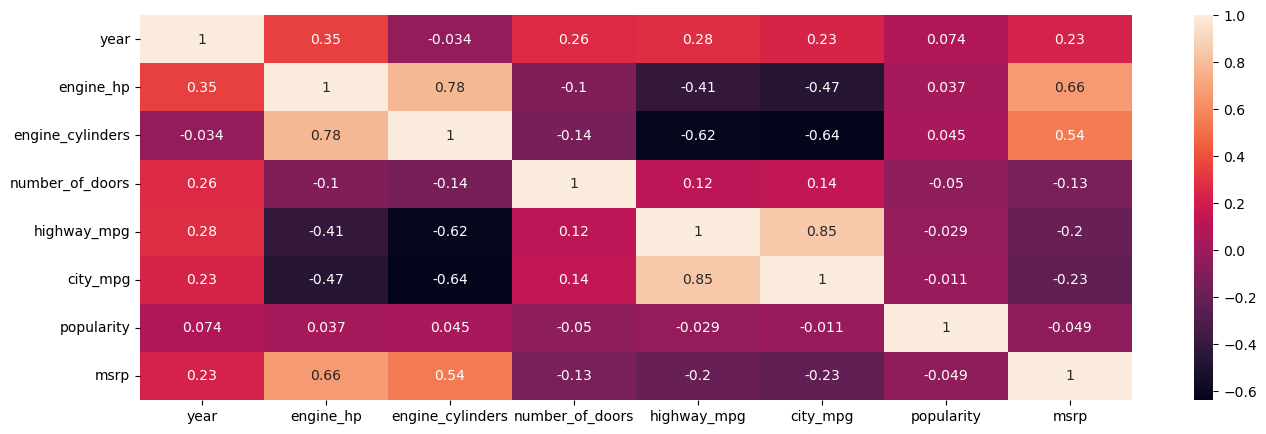

In [14]:
plt.figure(figsize=((16,5)))
sns.heatmap(df.corr(),annot=True)

In [15]:
x=df[["year","engine_hp","engine_cylinders"]]
y=df["msrp"]
model=LinearRegression()
model.fit(x,y)
model.score(x,y)


0.44039409956463027

In [16]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,1.181200e+04
mean,2010.361581,249.504487,5.649424,3.432526,26.320945,19.328141,1553.679902,4.055994e+04
std,7.594647,109.206947,1.751646,0.882919,7.443589,6.527734,1440.067820,6.028413e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220500e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


<Axes: xlabel='msrp', ylabel='Count'>

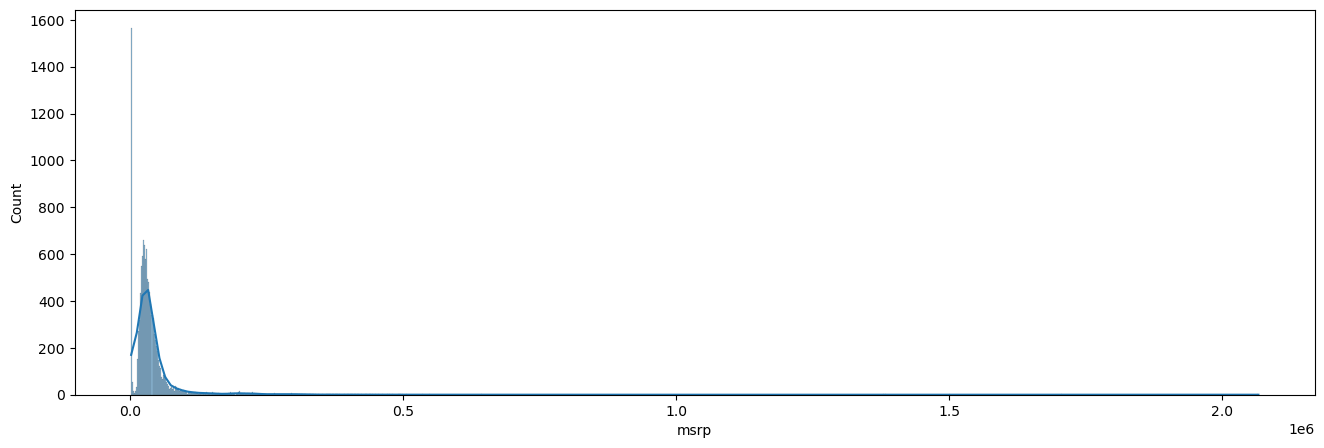

In [17]:
plt.figure(figsize=((16,5)))
sns.histplot(df["msrp"],kde=True)

In [18]:
df=df[df["msrp"]<1e6]

<Axes: xlabel='msrp', ylabel='Count'>

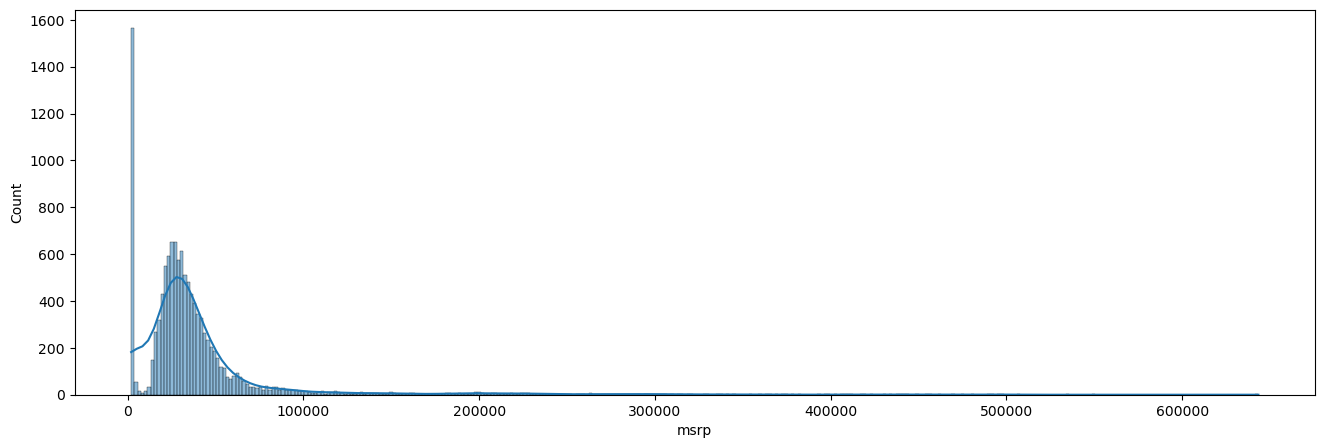

In [19]:
plt.figure(figsize=((16,5)))
sns.histplot(df["msrp"],kde=True)

<Axes: xlabel='engine_hp', ylabel='msrp'>

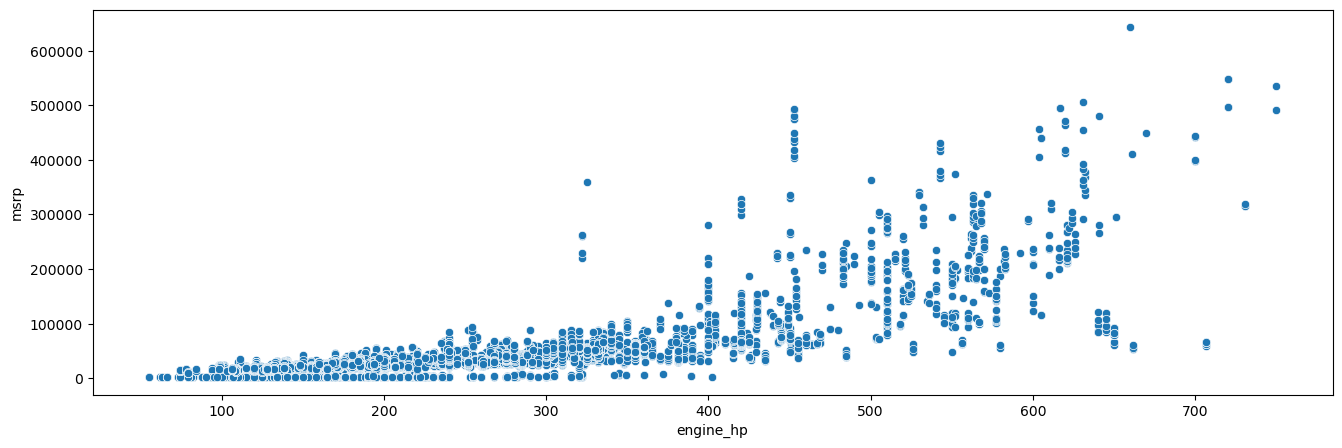

In [20]:
plt.figure(figsize=((16,5)))
sns.scatterplot(x=df["engine_hp"],y=df["msrp"])

In [21]:
df["engine_hp"]=np.where(df["engine_hp"]>700,700,df["engine_hp"])

<Axes: xlabel='engine_hp', ylabel='msrp'>

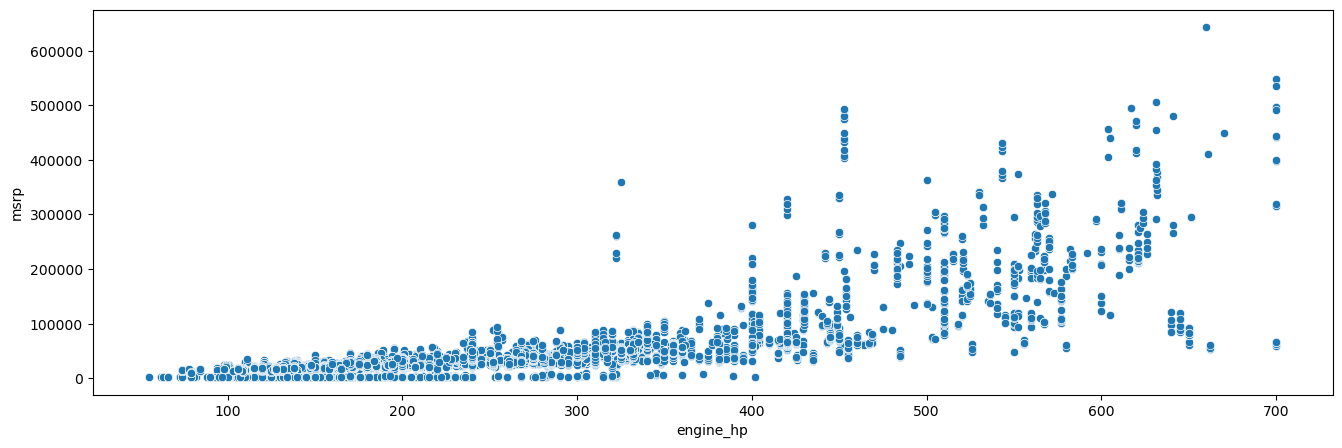

In [22]:
plt.figure(figsize=((16,5)))
sns.scatterplot(x=df["engine_hp"],y=df["msrp"])

In [23]:
plt.figure(figsize=((16,5)))
sns.bar(x=df["engine_cylinders"],y=df["msrp"])

AttributeError: module 'seaborn' has no attribute 'bar'

<Figure size 1600x500 with 0 Axes>

<Axes: xlabel='engine_cylinders', ylabel='msrp'>

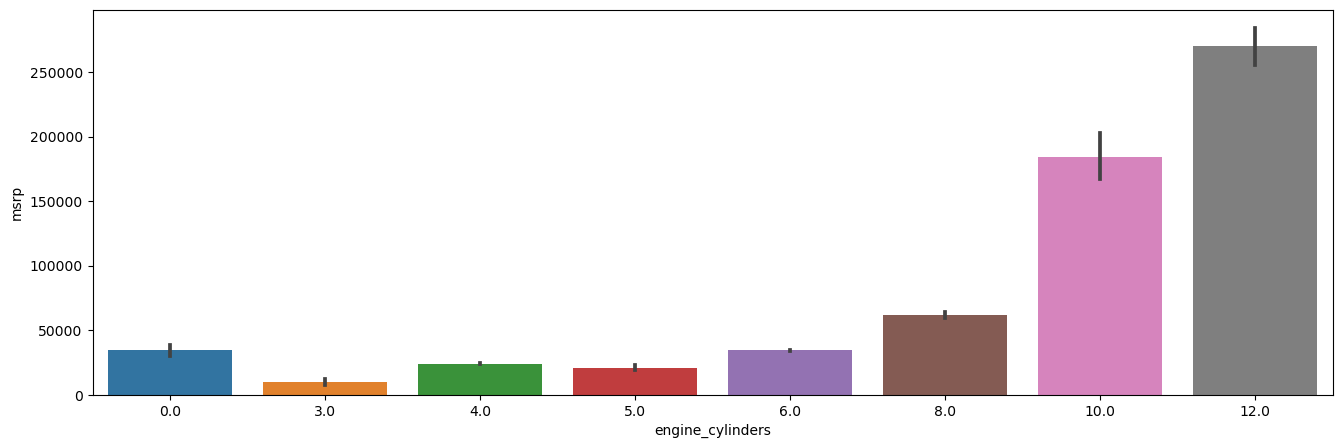

In [24]:
plt.figure(figsize=((16,5)))
sns.barplot(x=df["engine_cylinders"],y=df["msrp"])

In [25]:
df=df[df["engine_cylinders"]!=0]

<Axes: xlabel='engine_cylinders', ylabel='msrp'>

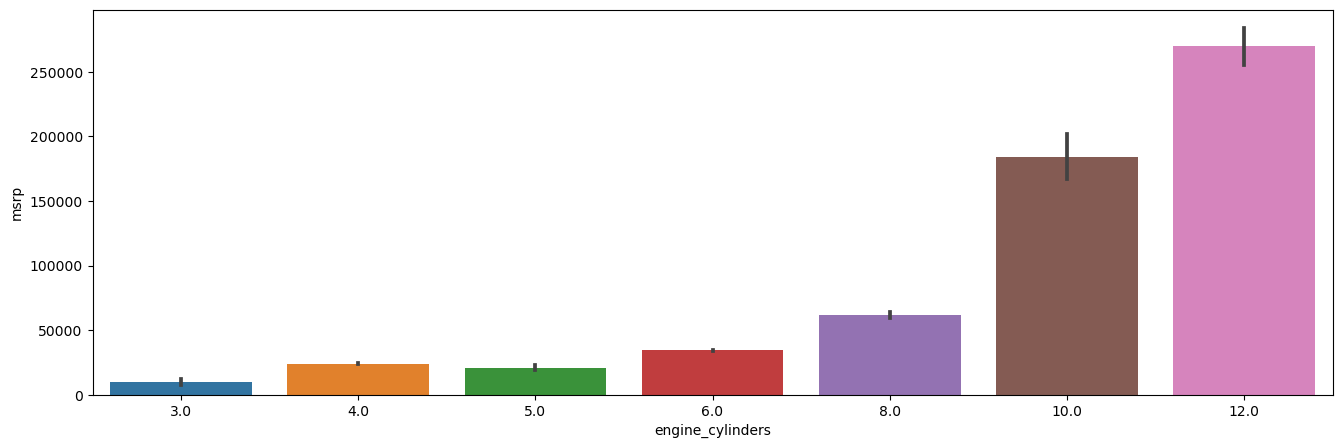

In [26]:
plt.figure(figsize=((16,5)))
sns.barplot(x=df["engine_cylinders"],y=df["msrp"])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11793 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11793 non-null  object 
 1   model              11793 non-null  object 
 2   year               11793 non-null  int64  
 3   engine_fuel_type   11793 non-null  object 
 4   engine_hp          11793 non-null  float64
 5   engine_cylinders   11793 non-null  float64
 6   transmission_type  11793 non-null  object 
 7   driven_wheels      11793 non-null  object 
 8   number_of_doors    11793 non-null  float64
 9   vehicle_size       11793 non-null  object 
 10  vehicle_style      11793 non-null  object 
 11  highway_mpg        11793 non-null  int64  
 12  city_mpg           11793 non-null  int64  
 13  popularity         11793 non-null  int64  
 14  msrp               11793 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


<Axes: xlabel='make', ylabel='msrp'>

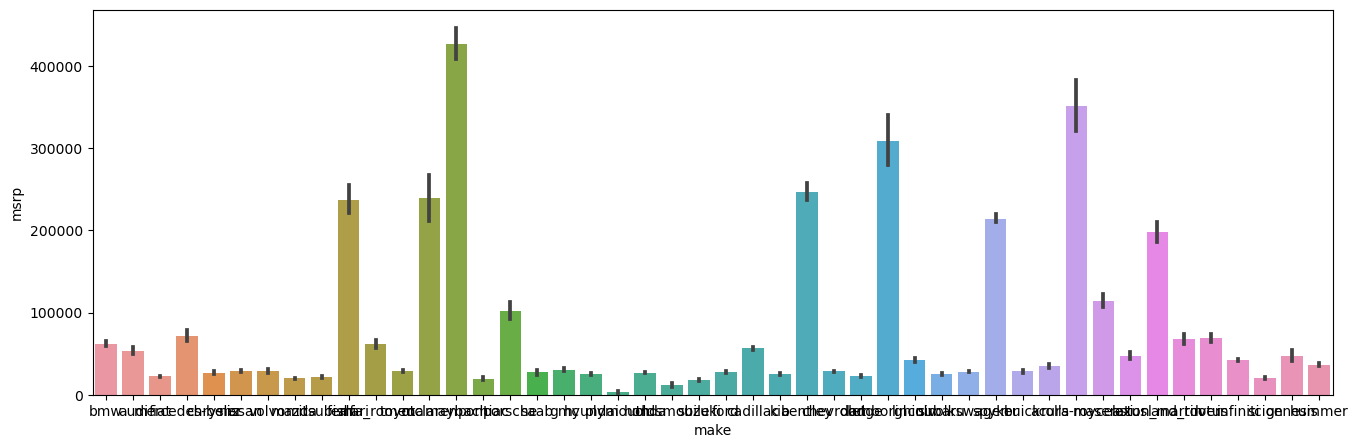

In [28]:
plt.figure(figsize=((16,5)))
sns.barplot(x=df["make"],y=df["msrp"])

In [29]:
df["make"].nunique()

46

<Axes: xlabel='model', ylabel='msrp'>

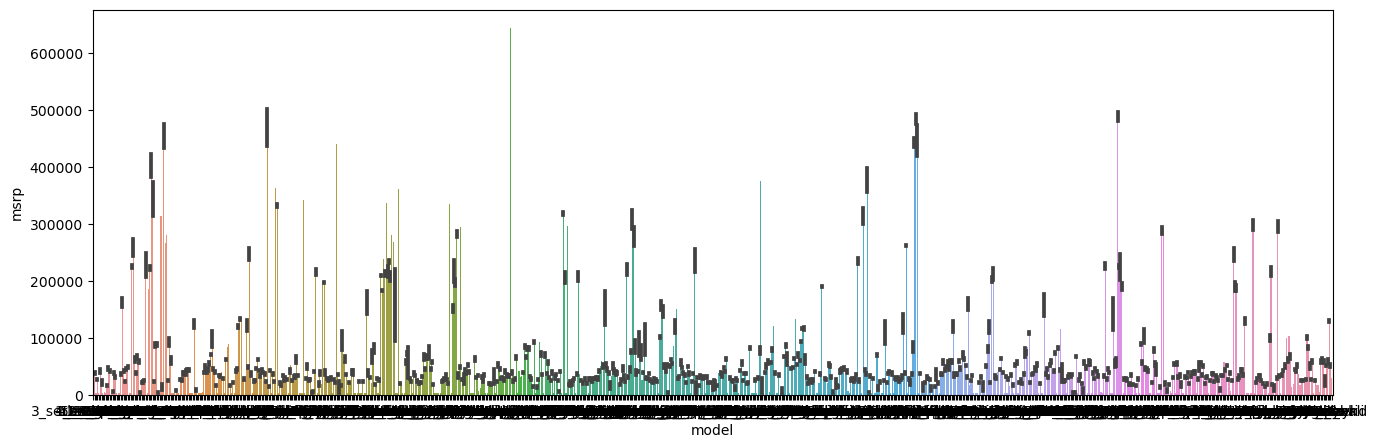

In [30]:
plt.figure(figsize=((16,5)))
sns.barplot(x=df["model"],y=df["msrp"])

In [31]:
df["model"].nunique()

897

<Axes: xlabel='engine_fuel_type', ylabel='msrp'>

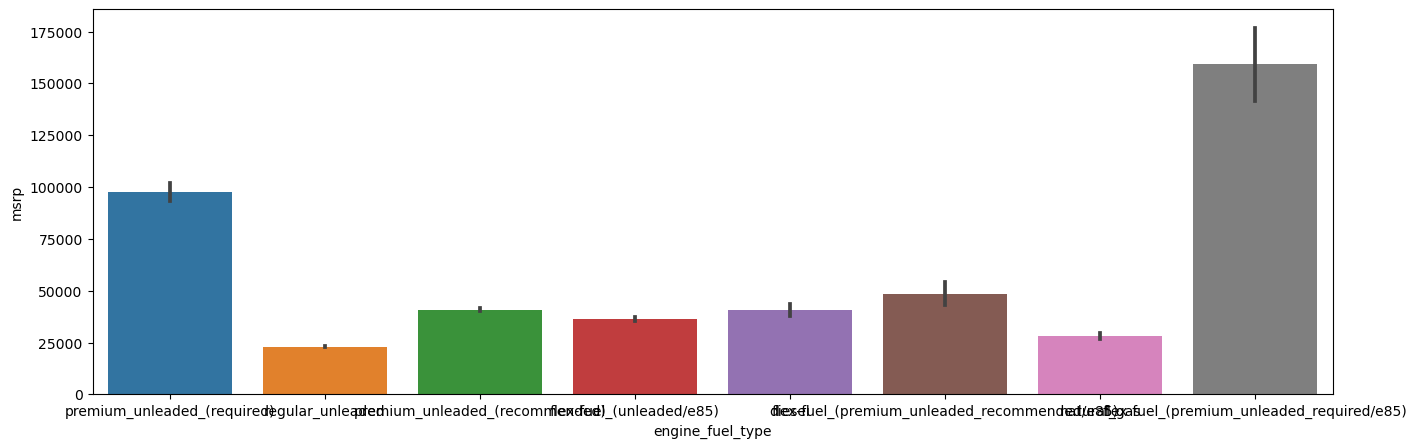

In [32]:
plt.figure(figsize=((16,5)))
sns.barplot(x=df["engine_fuel_type"],y=df["msrp"])

<Axes: xlabel='transmission_type', ylabel='msrp'>

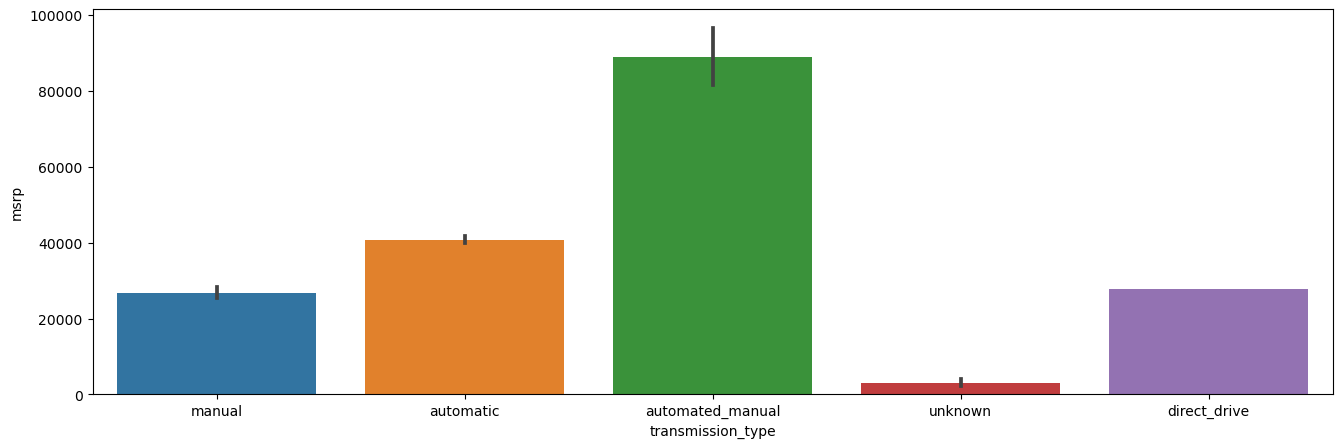

In [33]:
plt.figure(figsize=((16,5)))
sns.barplot(x=df["transmission_type"],y=df["msrp"])

<Axes: xlabel='driven_wheels', ylabel='msrp'>

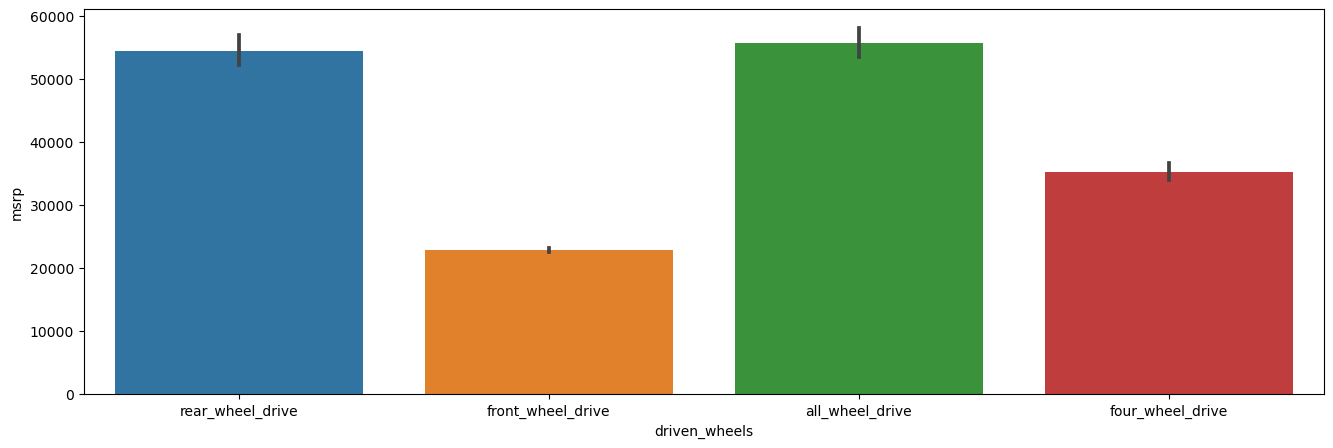

In [34]:
 
plt.figure(figsize=((16,5)))
sns.barplot(x=df["driven_wheels"],y=df["msrp"])

<Axes: xlabel='vehicle_size', ylabel='msrp'>

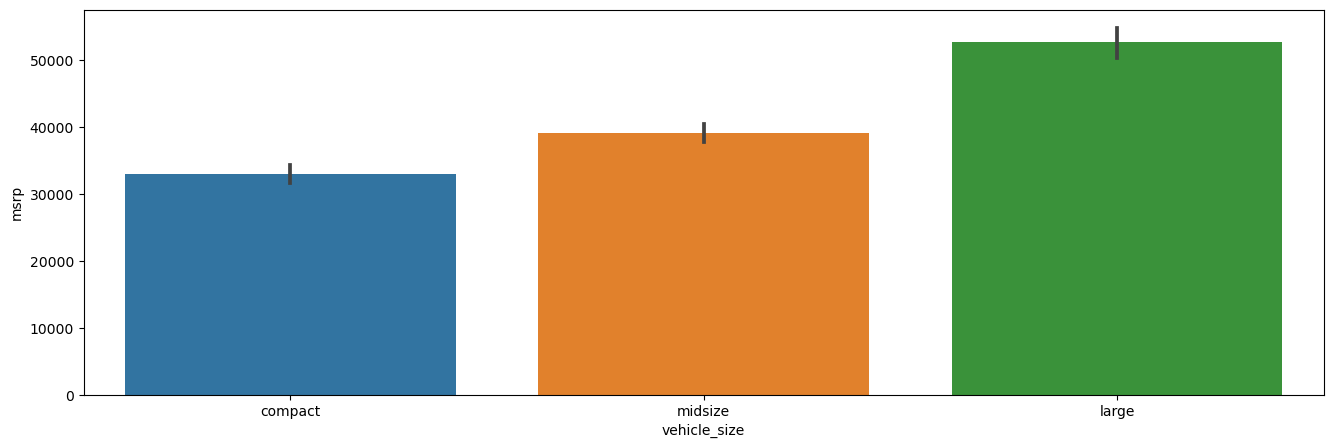

In [35]:

plt.figure(figsize=((16,5)))
sns.barplot(x=df["vehicle_size"],y=df["msrp"])

<Axes: xlabel='vehicle_style', ylabel='msrp'>

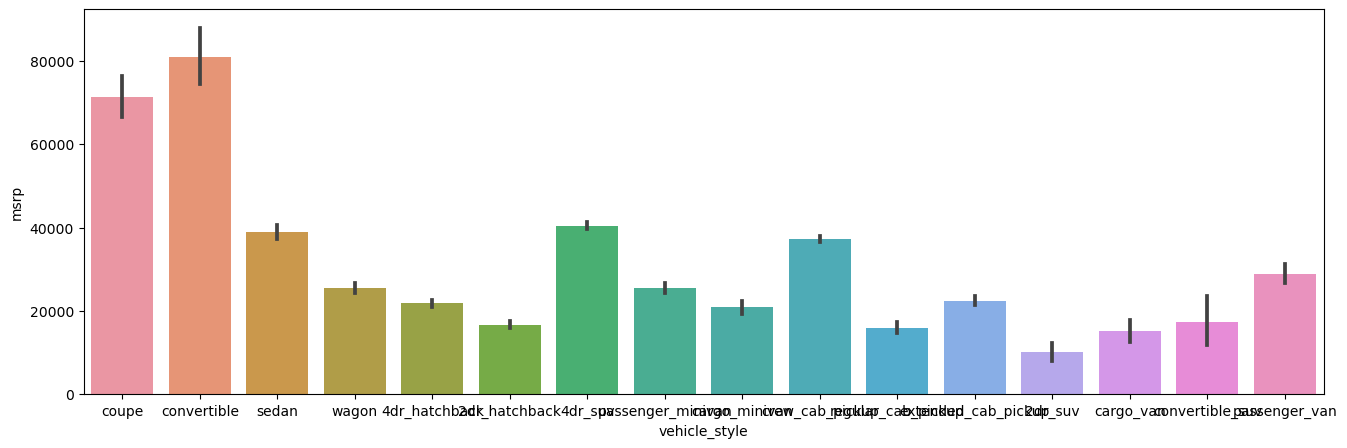

In [36]:

plt.figure(figsize=((16,5)))
sns.barplot(x=df["vehicle_style"],y=df["msrp"])

In [37]:
df=pd.get_dummies(df,columns=["make","vehicle_style","vehicle_size","driven_wheels","transmission_type","engine_fuel_type"])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11793 entries, 0 to 11913
Data columns (total 91 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   model                                                          11793 non-null  object 
 1   year                                                           11793 non-null  int64  
 2   engine_hp                                                      11793 non-null  float64
 3   engine_cylinders                                               11793 non-null  float64
 4   number_of_doors                                                11793 non-null  float64
 5   highway_mpg                                                    11793 non-null  int64  
 6   city_mpg                                                       11793 non-null  int64  
 7   popularity                                                

In [39]:
df=df.drop("model",axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11793 entries, 0 to 11913
Data columns (total 90 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   year                                                           11793 non-null  int64  
 1   engine_hp                                                      11793 non-null  float64
 2   engine_cylinders                                               11793 non-null  float64
 3   number_of_doors                                                11793 non-null  float64
 4   highway_mpg                                                    11793 non-null  int64  
 5   city_mpg                                                       11793 non-null  int64  
 6   popularity                                                     11793 non-null  int64  
 7   msrp                                                      

In [41]:
x=df.drop("msrp",axis=1)
y=df["msrp"]
model=LinearRegression()
model.fit(x,y)
model.score(x,y)

0.8675738727348296